# Pregunta 2

a) Se extraen los datos del dataset, categorizando la columna "CHAS" y dividiendolo en 2 partes. 3/4 partes del dataset, serán dedicadas a entrenamiento, mientras que el 25% restante será destinado a prueba. Luego, se normalizan los datos.

In [1]:
import pandas as pd

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"])
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0) #extrae 1/4 del dataset de forma aleatoria para la prueba
df.shape
df.info()
df.describe()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns) # normaliza datos
y_train = df_train.pop('MEDV').values.reshape(-1,1)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns) # normaliza datos
y_test = df_test.pop('MEDV').values.reshape(-1,1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


b) Para esta instancia, se entrenará una red shallow con inicialización uniforme, con los datos extraídos anteriormente. A esta red se le desprenderán los gradientes antes y después del entrenamiento. Los valores se encontrarán en las variables **evaluated_gradients**(pre-entrenamiento) y **postevaluated_gradients**(post-entrenamiento).

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
from keras import backend as K
import tensorflow as tf
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]


Using TensorFlow backend.


Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 333us/step - loss: 107.9921 - val_loss: 42.5341
Epoch 2/300
379/379 [==============================] - 0s 132us/step - loss: 30.0912 - val_loss: 33.0857
Epoch 3/300
379/379 [==============================] - 0s 121us/step - loss: 21.6493 - val_loss: 26.7049
Epoch 4/300
379/379 [==============================] - 0s 119us/step - loss: 17.2659 - val_loss: 23.4086
Epoch 5/300
379/379 [==============================] - 0s 132us/step - loss: 15.5320 - val_loss: 19.9401
Epoch 6/300
379/379 [==============================] - 0s 116us/step - loss: 13.2335 - val_loss: 16.8773
Epoch 7/300
379/379 [==============================] - 0s 119us/step - loss: 10.7210 - val_loss: 15.0434
Epoch 8/300
379/379 [==============================] - 0s 127us/step - loss: 9.4092 - val_loss: 13.9846
Epoch 9/300
379/379 [==============================] - 0s 132us/step - loss: 8.9667 - val_loss: 12.1638
Epoch 10/3

379/379 [==============================] - 0s 124us/step - loss: 0.2199 - val_loss: 0.2339
Epoch 80/300
379/379 [==============================] - 0s 119us/step - loss: 0.2135 - val_loss: 0.2042
Epoch 81/300
379/379 [==============================] - 0s 124us/step - loss: 0.2102 - val_loss: 0.2023
Epoch 82/300
379/379 [==============================] - 0s 119us/step - loss: 0.2289 - val_loss: 0.2300
Epoch 83/300
379/379 [==============================] - 0s 116us/step - loss: 0.2142 - val_loss: 0.1972
Epoch 84/300
379/379 [==============================] - 0s 119us/step - loss: 0.2225 - val_loss: 0.1951
Epoch 85/300
379/379 [==============================] - 0s 124us/step - loss: 0.2060 - val_loss: 0.1987
Epoch 86/300
379/379 [==============================] - 0s 124us/step - loss: 0.2042 - val_loss: 0.2117
Epoch 87/300
379/379 [==============================] - 0s 119us/step - loss: 0.2024 - val_loss: 0.2018
Epoch 88/300
379/379 [==============================] - 0s 127us/step - loss:

379/379 [==============================] - 0s 129us/step - loss: 0.1381 - val_loss: 0.1417
Epoch 158/300
379/379 [==============================] - 0s 121us/step - loss: 0.1382 - val_loss: 0.1479
Epoch 159/300
379/379 [==============================] - 0s 121us/step - loss: 0.1323 - val_loss: 0.1293
Epoch 160/300
379/379 [==============================] - 0s 114us/step - loss: 0.1351 - val_loss: 0.1292
Epoch 161/300
379/379 [==============================] - 0s 116us/step - loss: 0.1308 - val_loss: 0.1343
Epoch 162/300
379/379 [==============================] - 0s 108us/step - loss: 0.1318 - val_loss: 0.1729
Epoch 163/300
379/379 [==============================] - 0s 129us/step - loss: 0.1365 - val_loss: 0.1297
Epoch 164/300
379/379 [==============================] - 0s 119us/step - loss: 0.1374 - val_loss: 0.1269
Epoch 165/300
379/379 [==============================] - 0s 127us/step - loss: 0.1303 - val_loss: 0.1239
Epoch 166/300
379/379 [==============================] - 0s 127us/ste

379/379 [==============================] - 0s 129us/step - loss: 0.1020 - val_loss: 0.1044
Epoch 236/300
379/379 [==============================] - 0s 111us/step - loss: 0.1027 - val_loss: 0.1098
Epoch 237/300
379/379 [==============================] - 0s 124us/step - loss: 0.1050 - val_loss: 0.1321
Epoch 238/300
379/379 [==============================] - 0s 119us/step - loss: 0.1032 - val_loss: 0.1214
Epoch 239/300
379/379 [==============================] - 0s 121us/step - loss: 0.1018 - val_loss: 0.1104
Epoch 240/300
379/379 [==============================] - 0s 111us/step - loss: 0.0989 - val_loss: 0.1009
Epoch 241/300
379/379 [==============================] - 0s 119us/step - loss: 0.0998 - val_loss: 0.1073
Epoch 242/300
379/379 [==============================] - 0s 114us/step - loss: 0.0982 - val_loss: 0.1041
Epoch 243/300
379/379 [==============================] - 0s 119us/step - loss: 0.1014 - val_loss: 0.1009
Epoch 244/300
379/379 [==============================] - 0s 137us/ste

Luego de entrenar, se realizan histogramas de los gradientes obtenidos de cada variable en la capa oculta.

Gradientes antes de entrenar:


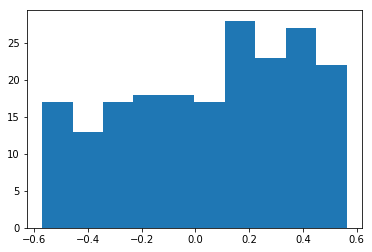

Gradientes despues de entrenar:


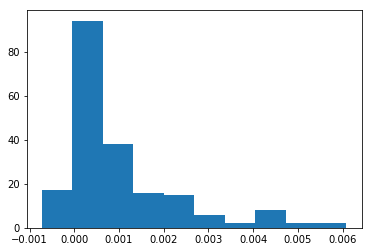

Comparacion de ambos gradientes:


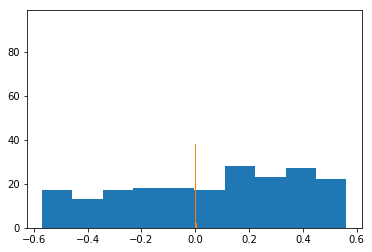

In [5]:
import matplotlib.pyplot as plt
print("Gradientes antes de entrenar:")
plt.hist(evaluated_gradients[1])
plt.show()
print("Gradientes despues de entrenar:")
plt.hist(postevaluated_gradients[1])
plt.show()
print("Comparacion de ambos gradientes:")
plt.hist(evaluated_gradients[1])
plt.hist(postevaluated_gradients[1])
plt.show()

De los gráficos se puede abstraer que los gradientes obtenidos después del entrenamiento, se encuentran en su mayoría cerca del valor 0 (-0.001, 0.006]. Por lo que se puede asumir que la variación de esta será miníma acorde avanza el tiempo y por consiguiente el aprendizaje no mejorará a un gran ritmo. Por lo que estamos presentes a un caso de "gradientes desvanecientes".

c)

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 470us/step - loss: 199.0857 - val_loss: 81.7260
Epoch 2/300
379/379 [==============================] - 0s 164us/step - loss: 86.3436 - val_loss: 83.5471
Epoch 3/300
379/379 [==============================] - 0s 164us/step - loss: 86.0817 - val_loss: 82.6397
Epoch 4/300
379/379 [==============================] - 0s 158us/step - loss: 86.2659 - val_loss: 81.8731
Epoch 5/300
379/379 [==============================] - 0s 156us/step - loss: 86.8772 - val_loss: 84.1568
Epoch 6/300
379/379 [==============================] - 0s 174us/step - loss: 86.6243 - val_loss: 83.5154
Epoch 7/300
379/379 [==============================] - 0s 166us/step - loss: 85.5646 - val_loss: 83.8421
Epoch 8/300
379/379 [==============================] - 0s 177us/step - loss: 86.9751 - val_loss: 82.2176
Epoch 9/300
379/379 [==============================] - 0s 158us/step - loss: 85.4711 - val_loss: 82.5789
Epoch 10

Epoch 78/300
379/379 [==============================] - 0s 156us/step - loss: 86.8652 - val_loss: 81.7675
Epoch 79/300
379/379 [==============================] - 0s 151us/step - loss: 86.6701 - val_loss: 81.7062
Epoch 80/300
379/379 [==============================] - 0s 153us/step - loss: 86.6613 - val_loss: 83.5481
Epoch 81/300
379/379 [==============================] - 0s 145us/step - loss: 88.3666 - val_loss: 82.9869
Epoch 82/300
379/379 [==============================] - 0s 151us/step - loss: 86.4702 - val_loss: 82.4827
Epoch 83/300
379/379 [==============================] - 0s 148us/step - loss: 85.6129 - val_loss: 85.7435
Epoch 84/300
379/379 [==============================] - 0s 145us/step - loss: 88.5685 - val_loss: 81.6900
Epoch 85/300
379/379 [==============================] - 0s 156us/step - loss: 85.9667 - val_loss: 81.9280
Epoch 86/300
379/379 [==============================] - 0s 166us/step - loss: 86.4065 - val_loss: 82.5480
Epoch 87/300
379/379 [========================

Epoch 155/300
379/379 [==============================] - 0s 161us/step - loss: 85.9916 - val_loss: 82.7228
Epoch 156/300
379/379 [==============================] - 0s 158us/step - loss: 87.0547 - val_loss: 82.7157
Epoch 157/300
379/379 [==============================] - 0s 177us/step - loss: 87.6707 - val_loss: 81.4531
Epoch 158/300
379/379 [==============================] - 0s 151us/step - loss: 85.9592 - val_loss: 84.3088
Epoch 159/300
379/379 [==============================] - 0s 158us/step - loss: 87.6186 - val_loss: 81.6699
Epoch 160/300
379/379 [==============================] - 0s 161us/step - loss: 86.2004 - val_loss: 82.1512
Epoch 161/300
379/379 [==============================] - 0s 164us/step - loss: 86.3895 - val_loss: 81.4161
Epoch 162/300
379/379 [==============================] - 0s 153us/step - loss: 86.2353 - val_loss: 82.2547
Epoch 163/300
379/379 [==============================] - 0s 153us/step - loss: 86.1882 - val_loss: 82.7041
Epoch 164/300
379/379 [==============

379/379 [==============================] - 0s 158us/step - loss: 4.0316 - val_loss: 1.2607
Epoch 233/300
379/379 [==============================] - 0s 166us/step - loss: 1.4148 - val_loss: 1.7136
Epoch 234/300
379/379 [==============================] - 0s 177us/step - loss: 1.2921 - val_loss: 1.1398
Epoch 235/300
379/379 [==============================] - 0s 185us/step - loss: 0.9367 - val_loss: 1.2003
Epoch 236/300
379/379 [==============================] - 0s 164us/step - loss: 1.4132 - val_loss: 3.0464
Epoch 237/300
379/379 [==============================] - 0s 164us/step - loss: 2.4130 - val_loss: 1.2328
Epoch 238/300
379/379 [==============================] - 0s 158us/step - loss: 1.3243 - val_loss: 2.1630
Epoch 239/300
379/379 [==============================] - 0s 193us/step - loss: 2.3424 - val_loss: 1.3949
Epoch 240/300
379/379 [==============================] - 0s 153us/step - loss: 0.9107 - val_loss: 1.1265
Epoch 241/300
379/379 [==============================] - 0s 164us/ste

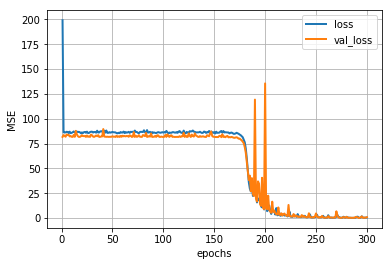

In [6]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(100,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(50, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(25, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


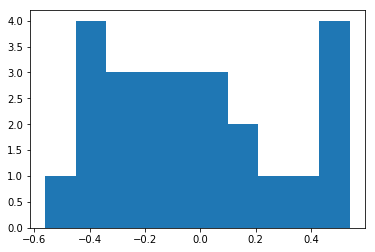

Gradientes despues de entrenar(ultima capa oculta):


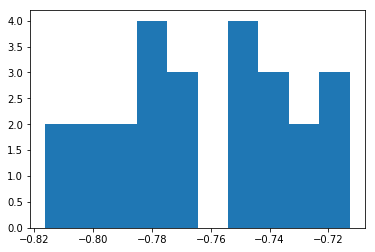

In [15]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(4ta capa oculta):


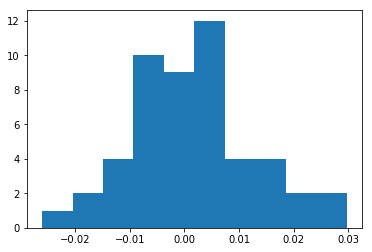

Gradientes despues de entrenar(4ta capa oculta):


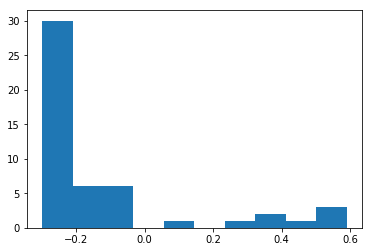

In [14]:
print("Gradientes antes de entrenar(4ta capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(4ta capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(3ra capa oculta):


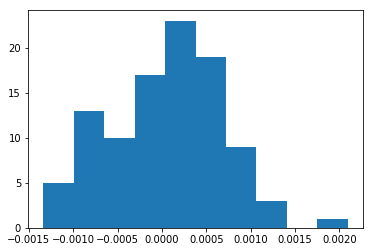

Gradientes despues de entrenar(3ra capa oculta):


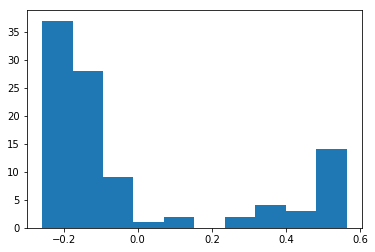

In [13]:
print("Gradientes antes de entrenar(3ra capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(3ra capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(2ra capa oculta):


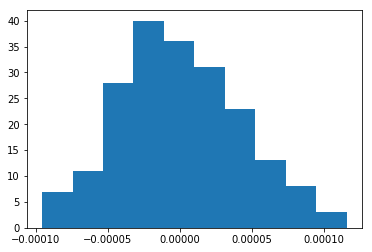

Gradientes despues de entrenar(2ra capa oculta):


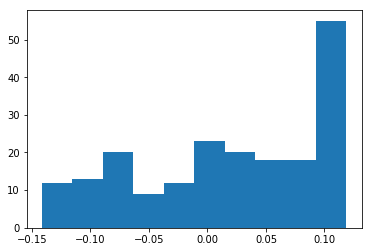

In [12]:
print("Gradientes antes de entrenar(2da capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(2da capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

# DDDDD

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 0s 541us/step - loss: 183.7098 - val_loss: 81.7445
Epoch 2/300
379/379 [==============================] - 0s 177us/step - loss: 85.7094 - val_loss: 81.9734
Epoch 3/300
379/379 [==============================] - 0s 166us/step - loss: 85.9387 - val_loss: 82.4542
Epoch 4/300
379/379 [==============================] - 0s 166us/step - loss: 87.2334 - val_loss: 85.5227
Epoch 5/300
379/379 [==============================] - 0s 158us/step - loss: 87.5725 - val_loss: 82.0426
Epoch 6/300
379/379 [==============================] - 0s 153us/step - loss: 85.6653 - val_loss: 81.6762
Epoch 7/300
379/379 [==============================] - 0s 177us/step - loss: 86.4126 - val_loss: 83.7572
Epoch 8/300
379/379 [==============================] - 0s 172us/step - loss: 86.5976 - val_loss: 82.1469
Epoch 9/300
379/379 [==============================] - 0s 185us/step - loss: 87.0432 - val_loss: 82.3653
Epoch 10

379/379 [==============================] - 0s 158us/step - loss: 1.6284 - val_loss: 2.4307
Epoch 79/300
379/379 [==============================] - 0s 164us/step - loss: 1.7912 - val_loss: 1.4750
Epoch 80/300
379/379 [==============================] - 0s 169us/step - loss: 1.7963 - val_loss: 2.7194
Epoch 81/300
379/379 [==============================] - 0s 151us/step - loss: 3.1063 - val_loss: 6.6098
Epoch 82/300
379/379 [==============================] - 0s 177us/step - loss: 3.4110 - val_loss: 2.1224
Epoch 83/300
379/379 [==============================] - 0s 164us/step - loss: 2.0885 - val_loss: 2.1918
Epoch 84/300
379/379 [==============================] - 0s 172us/step - loss: 1.9302 - val_loss: 1.3540
Epoch 85/300
379/379 [==============================] - 0s 166us/step - loss: 0.9874 - val_loss: 1.1610
Epoch 86/300
379/379 [==============================] - 0s 182us/step - loss: 0.8364 - val_loss: 1.0620
Epoch 87/300
379/379 [==============================] - 0s 188us/step - loss:

379/379 [==============================] - 0s 195us/step - loss: 0.2479 - val_loss: 0.1687
Epoch 157/300
379/379 [==============================] - 0s 153us/step - loss: 0.1839 - val_loss: 0.1054
Epoch 158/300
379/379 [==============================] - 0s 161us/step - loss: 0.1176 - val_loss: 0.1013
Epoch 159/300
379/379 [==============================] - 0s 172us/step - loss: 0.2521 - val_loss: 0.2667
Epoch 160/300
379/379 [==============================] - 0s 188us/step - loss: 0.2697 - val_loss: 0.4740
Epoch 161/300
379/379 [==============================] - 0s 161us/step - loss: 0.9728 - val_loss: 0.7356
Epoch 162/300
379/379 [==============================] - 0s 161us/step - loss: 0.6608 - val_loss: 0.2320
Epoch 163/300
379/379 [==============================] - 0s 166us/step - loss: 0.1225 - val_loss: 0.1302
Epoch 164/300
379/379 [==============================] - 0s 164us/step - loss: 0.2507 - val_loss: 0.4267
Epoch 165/300
379/379 [==============================] - 0s 182us/ste

379/379 [==============================] - 0s 185us/step - loss: 0.1368 - val_loss: 0.2658
Epoch 235/300
379/379 [==============================] - 0s 180us/step - loss: 0.2365 - val_loss: 0.2074
Epoch 236/300
379/379 [==============================] - 0s 372us/step - loss: 0.0905 - val_loss: 0.0437
Epoch 237/300
379/379 [==============================] - 0s 198us/step - loss: 0.0723 - val_loss: 0.0659
Epoch 238/300
379/379 [==============================] - 0s 161us/step - loss: 0.1584 - val_loss: 0.3092
Epoch 239/300
379/379 [==============================] - 0s 161us/step - loss: 0.3526 - val_loss: 0.4833
Epoch 240/300
379/379 [==============================] - 0s 161us/step - loss: 0.3697 - val_loss: 0.2696
Epoch 241/300
379/379 [==============================] - 0s 158us/step - loss: 0.2386 - val_loss: 0.0967
Epoch 242/300
379/379 [==============================] - 0s 169us/step - loss: 0.0670 - val_loss: 0.0941
Epoch 243/300
379/379 [==============================] - 0s 177us/ste

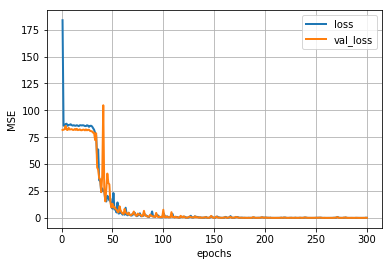

In [16]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(100,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(50, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(25, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


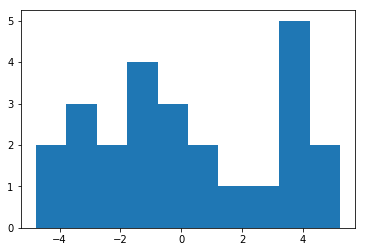

Gradientes despues de entrenar(ultima capa oculta):


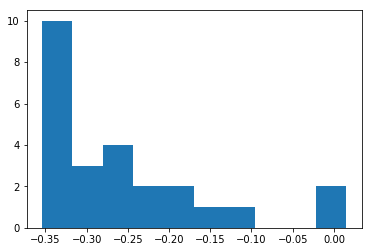

In [17]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(4ta capa oculta):


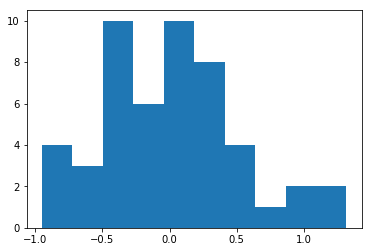

Gradientes despues de entrenar(4ta capa oculta):


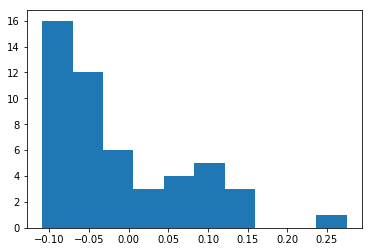

In [18]:
print("Gradientes antes de entrenar(4ta capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(4ta capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(3ra capa oculta):


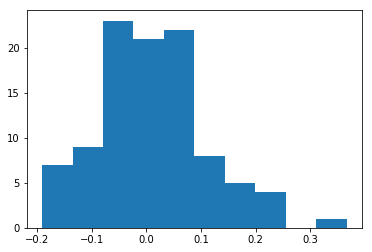

Gradientes despues de entrenar(3ra capa oculta):


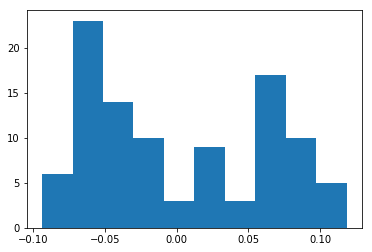

In [19]:
print("Gradientes antes de entrenar(3ra capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(3ra capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(2da capa oculta):


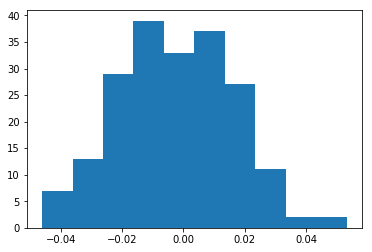

Gradientes despues de entrenar(2da capa oculta):


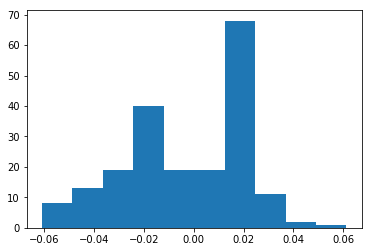

In [20]:
print("Gradientes antes de entrenar(2da capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(2da capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

# EEEEEE

## parte relu

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 490.1437 - val_loss: 293.2301
Epoch 2/300
379/379 [==============================] - 0s 172us/step - loss: 130.0536 - val_loss: 306.7107
Epoch 3/300
379/379 [==============================] - 0s 169us/step - loss: 131.8442 - val_loss: 81.3980
Epoch 4/300
379/379 [==============================] - 0s 180us/step - loss: 78.3947 - val_loss: 67.3500
Epoch 5/300
379/379 [==============================] - 0s 158us/step - loss: 70.9849 - val_loss: 76.2249
Epoch 6/300
379/379 [==============================] - 0s 161us/step - loss: 69.1896 - val_loss: 72.8977
Epoch 7/300
379/379 [==============================] - 0s 169us/step - loss: 52.3986 - val_loss: 60.7947
Epoch 8/300
379/379 [==============================] - 0s 164us/step - loss: 46.7833 - val_loss: 82.9033
Epoch 9/300
379/379 [==============================] - 0s 164us/step - loss: 42.7226 - val_loss: 102.2464
Epoch

Epoch 78/300
379/379 [==============================] - 0s 180us/step - loss: 86.7257 - val_loss: 82.4878
Epoch 79/300
379/379 [==============================] - 0s 172us/step - loss: 85.8433 - val_loss: 81.8199
Epoch 80/300
379/379 [==============================] - 0s 169us/step - loss: 88.3615 - val_loss: 82.0981
Epoch 81/300
379/379 [==============================] - 0s 182us/step - loss: 86.2952 - val_loss: 81.8756
Epoch 82/300
379/379 [==============================] - 0s 182us/step - loss: 86.5170 - val_loss: 82.1639
Epoch 83/300
379/379 [==============================] - 0s 161us/step - loss: 89.2835 - val_loss: 84.0052
Epoch 84/300
379/379 [==============================] - 0s 166us/step - loss: 88.5696 - val_loss: 81.6990
Epoch 85/300
379/379 [==============================] - 0s 182us/step - loss: 85.8130 - val_loss: 81.7085
Epoch 86/300
379/379 [==============================] - 0s 164us/step - loss: 88.7423 - val_loss: 81.6999
Epoch 87/300
379/379 [========================

Epoch 155/300
379/379 [==============================] - 0s 180us/step - loss: 86.4770 - val_loss: 81.7340
Epoch 156/300
379/379 [==============================] - 0s 164us/step - loss: 87.1657 - val_loss: 81.7714
Epoch 157/300
379/379 [==============================] - 0s 193us/step - loss: 88.3534 - val_loss: 81.9792
Epoch 158/300
379/379 [==============================] - 0s 209us/step - loss: 88.0489 - val_loss: 81.7874
Epoch 159/300
379/379 [==============================] - 0s 188us/step - loss: 86.0979 - val_loss: 85.1435
Epoch 160/300
379/379 [==============================] - 0s 172us/step - loss: 87.1068 - val_loss: 82.4750
Epoch 161/300
379/379 [==============================] - 0s 182us/step - loss: 86.9938 - val_loss: 82.7335
Epoch 162/300
379/379 [==============================] - 0s 177us/step - loss: 86.7643 - val_loss: 81.7811
Epoch 163/300
379/379 [==============================] - 0s 164us/step - loss: 85.4180 - val_loss: 83.0313
Epoch 164/300
379/379 [==============

379/379 [==============================] - 0s 166us/step - loss: 86.4107 - val_loss: 81.8314
Epoch 232/300
379/379 [==============================] - 0s 166us/step - loss: 87.7945 - val_loss: 82.1023
Epoch 233/300
379/379 [==============================] - 0s 182us/step - loss: 85.8875 - val_loss: 84.1315
Epoch 234/300
379/379 [==============================] - 0s 174us/step - loss: 88.1835 - val_loss: 84.3710
Epoch 235/300
379/379 [==============================] - 0s 166us/step - loss: 87.7989 - val_loss: 81.9678
Epoch 236/300
379/379 [==============================] - 0s 169us/step - loss: 85.6477 - val_loss: 87.0221
Epoch 237/300
379/379 [==============================] - 0s 169us/step - loss: 86.9745 - val_loss: 82.0869
Epoch 238/300
379/379 [==============================] - 0s 166us/step - loss: 86.1472 - val_loss: 81.7028
Epoch 239/300
379/379 [==============================] - 0s 190us/step - loss: 86.2466 - val_loss: 85.2106
Epoch 240/300
379/379 [============================

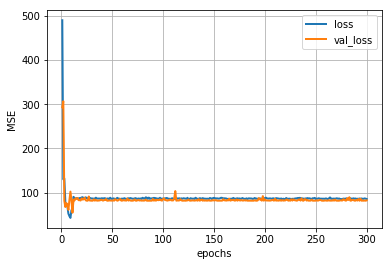

In [44]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(100,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(50, kernel_initializer='uniform',activation='relu'))
model.add(Dense(25, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


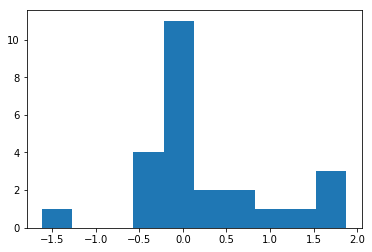

Gradientes despues de entrenar(ultima capa oculta):


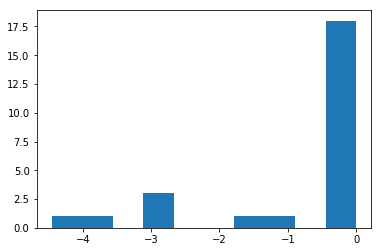

In [45]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(4ta capa oculta):


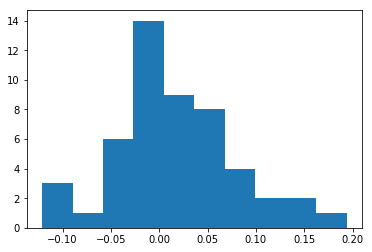

Gradientes despues de entrenar(4ta capa oculta):


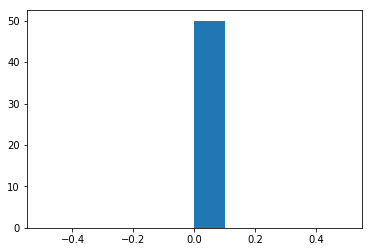

In [46]:
print("Gradientes antes de entrenar(4ta capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(4ta capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(3ra capa oculta):


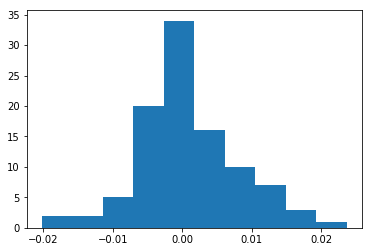

Gradientes despues de entrenar(3ra capa oculta):


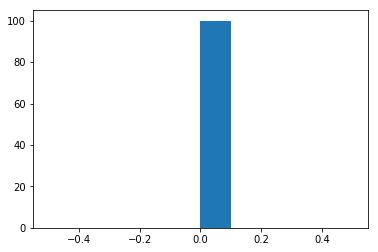

In [47]:
print("Gradientes antes de entrenar(3ra capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(3ra capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(2da capa oculta):


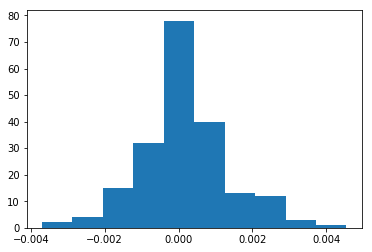

Gradientes despues de entrenar(2da capa oculta):


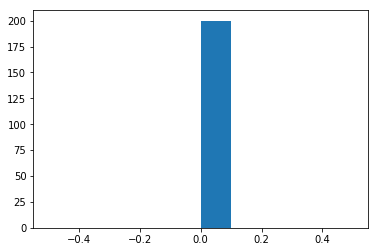

In [48]:
print("Gradientes antes de entrenar(2da capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(2da capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

## parte he

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/300
379/379 [==============================] - 0s 182us/step - loss: nan - val_loss: nan
Epoch 3/300
379/379 [==============================] - 0s 169us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 172us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 166us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 177us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==============================] - 0s 180us/step - loss: nan -

379/379 [==============================] - 0s 169us/step - loss: nan - val_loss: nan
Epoch 85/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 86/300
379/379 [==============================] - 0s 180us/step - loss: nan - val_loss: nan
Epoch 87/300
379/379 [==============================] - 0s 182us/step - loss: nan - val_loss: nan
Epoch 88/300
379/379 [==============================] - 0s 166us/step - loss: nan - val_loss: nan
Epoch 89/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 90/300
379/379 [==============================] - 0s 177us/step - loss: nan - val_loss: nan
Epoch 91/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 92/300
379/379 [==============================] - 0s 177us/step - loss: nan - val_loss: nan
Epoch 93/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 94/300
379/379 [===========

379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 166us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 158us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 166us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 185us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 174us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 177/300
379/379 [=

Epoch 250/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 251/300
379/379 [==============================] - 0s 190us/step - loss: nan - val_loss: nan
Epoch 252/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 253/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 254/300
379/379 [==============================] - 0s 156us/step - loss: nan - val_loss: nan
Epoch 255/300
379/379 [==============================] - 0s 177us/step - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s 153us/step - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s 180us/step - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 259/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 260/

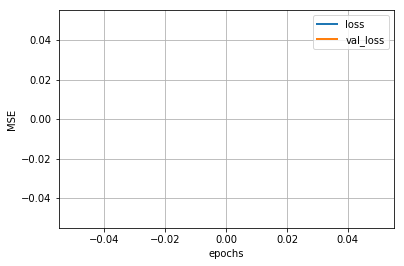

In [50]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(100,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(50, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(25, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


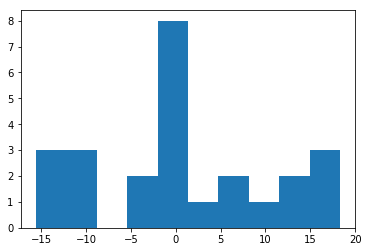

Gradientes despues de entrenar(ultima capa oculta):


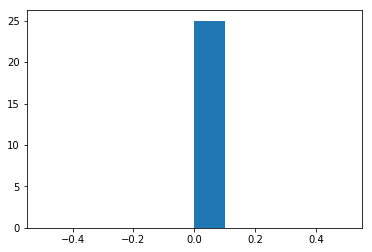

In [51]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


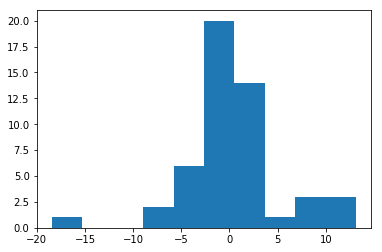

Gradientes despues de entrenar(ultima capa oculta):


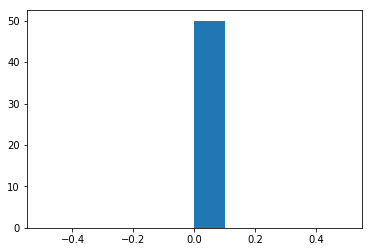

In [52]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


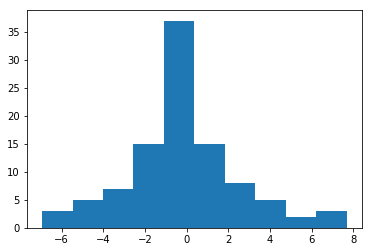

Gradientes despues de entrenar(ultima capa oculta):


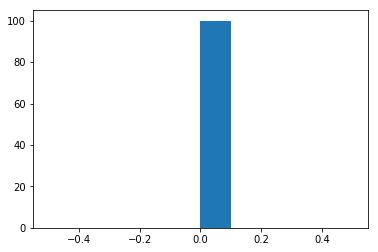

In [53]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


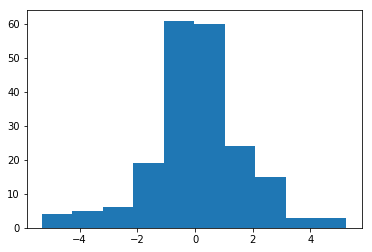

Gradientes despues de entrenar(ultima capa oculta):


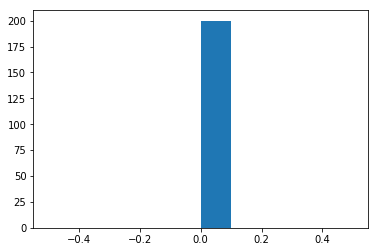

In [54]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

## e.e

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 159.9839 - val_loss: 82.4783
Epoch 2/300
379/379 [==============================] - 0s 203us/step - loss: 88.5285 - val_loss: 81.7037
Epoch 3/300
379/379 [==============================] - 0s 185us/step - loss: 87.2054 - val_loss: 82.0254
Epoch 4/300
379/379 [==============================] - 0s 182us/step - loss: 89.4667 - val_loss: 81.8792
Epoch 5/300
379/379 [==============================] - 0s 190us/step - loss: 91.5033 - val_loss: 84.1633
Epoch 6/300
379/379 [==============================] - 0s 198us/step - loss: 86.1716 - val_loss: 92.4983
Epoch 7/300
379/379 [==============================] - 0s 188us/step - loss: 89.8385 - val_loss: 81.7467
Epoch 8/300
379/379 [==============================] - 0s 182us/step - loss: 87.6349 - val_loss: 82.2075
Epoch 9/300
379/379 [==============================] - 0s 190us/step - loss: 86.2641 - val_loss: 82.0609
Epoch 10/3

Epoch 79/300
379/379 [==============================] - 0s 188us/step - loss: 0.0509 - val_loss: 0.0980
Epoch 80/300
379/379 [==============================] - 0s 180us/step - loss: 0.0364 - val_loss: 0.1018
Epoch 81/300
379/379 [==============================] - 0s 188us/step - loss: 0.0546 - val_loss: 0.1094
Epoch 82/300
379/379 [==============================] - 0s 182us/step - loss: 0.0664 - val_loss: 0.1518
Epoch 83/300
379/379 [==============================] - 0s 185us/step - loss: 0.0403 - val_loss: 0.0873
Epoch 84/300
379/379 [==============================] - 0s 188us/step - loss: 0.0303 - val_loss: 0.1105
Epoch 85/300
379/379 [==============================] - 0s 190us/step - loss: 0.0638 - val_loss: 0.4964
Epoch 86/300
379/379 [==============================] - 0s 188us/step - loss: 0.4281 - val_loss: 0.1152
Epoch 87/300
379/379 [==============================] - 0s 195us/step - loss: 0.0726 - val_loss: 0.1276
Epoch 88/300
379/379 [==============================] - 0s 185us

379/379 [==============================] - 0s 193us/step - loss: 0.0672 - val_loss: 0.0501
Epoch 158/300
379/379 [==============================] - 0s 193us/step - loss: 0.0467 - val_loss: 0.0601
Epoch 159/300
379/379 [==============================] - 0s 203us/step - loss: 0.0232 - val_loss: 0.0469
Epoch 160/300
379/379 [==============================] - 0s 190us/step - loss: 0.0131 - val_loss: 0.0469
Epoch 161/300
379/379 [==============================] - 0s 169us/step - loss: 0.0317 - val_loss: 0.1899
Epoch 162/300
379/379 [==============================] - 0s 180us/step - loss: 0.1688 - val_loss: 0.0537
Epoch 163/300
379/379 [==============================] - 0s 193us/step - loss: 0.0577 - val_loss: 0.0831
Epoch 164/300
379/379 [==============================] - 0s 182us/step - loss: 0.0200 - val_loss: 0.0488
Epoch 165/300
379/379 [==============================] - 0s 188us/step - loss: 0.0140 - val_loss: 0.0473
Epoch 166/300
379/379 [==============================] - 0s 188us/ste

379/379 [==============================] - 0s 188us/step - loss: 0.0127 - val_loss: 0.0324
Epoch 236/300
379/379 [==============================] - 0s 195us/step - loss: 0.0072 - val_loss: 0.0320
Epoch 237/300
379/379 [==============================] - 0s 190us/step - loss: 0.0070 - val_loss: 0.0435
Epoch 238/300
379/379 [==============================] - 0s 188us/step - loss: 0.0078 - val_loss: 0.0286
Epoch 239/300
379/379 [==============================] - 0s 185us/step - loss: 0.0048 - val_loss: 0.0343
Epoch 240/300
379/379 [==============================] - 0s 174us/step - loss: 0.0049 - val_loss: 0.0300
Epoch 241/300
379/379 [==============================] - 0s 185us/step - loss: 0.0262 - val_loss: 0.0522
Epoch 242/300
379/379 [==============================] - 0s 177us/step - loss: 0.0111 - val_loss: 0.0330
Epoch 243/300
379/379 [==============================] - 0s 198us/step - loss: 0.0063 - val_loss: 0.0330
Epoch 244/300
379/379 [==============================] - 0s 177us/ste

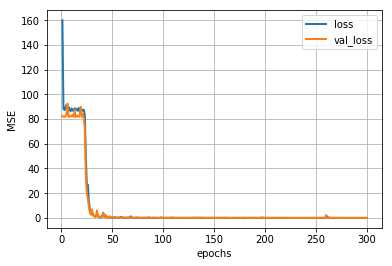

In [66]:
model = Sequential()
model.add(Dense(400, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(100,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(50, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(25, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='mean_squared_error')
### calculate gradients
loss = tf.keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
# We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.as_matrix()})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()


# gradientes una vez terminado el entrenamiento
postloss = tf.keras.losses.mean_squared_error(model.output,y_train)
postlistOfVariableTensors = model.trainable_weights
postgradients = K.gradients(postloss, postlistOfVariableTensors)
sess = K.get_session()
postevaluated_gradients = sess.run(postgradients,feed_dict={model.input:X_train_scaled.as_matrix()})
postevaluated_gradients = [gradient/len(y_train) for gradient in postevaluated_gradients]

Gradientes antes de entrenar(ultima capa oculta):


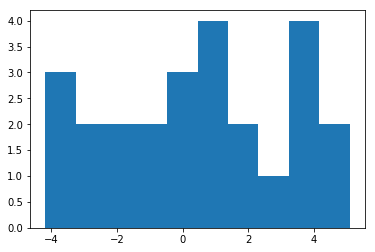

Gradientes despues de entrenar(ultima capa oculta):


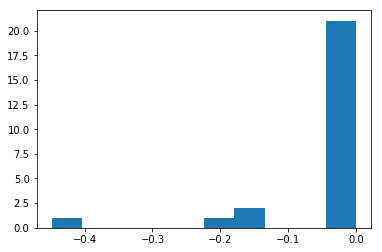

In [60]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[9])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[9])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


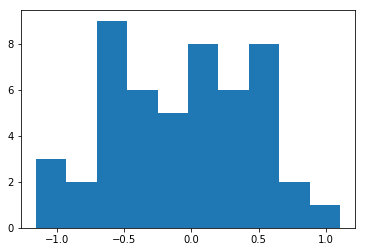

Gradientes despues de entrenar(ultima capa oculta):


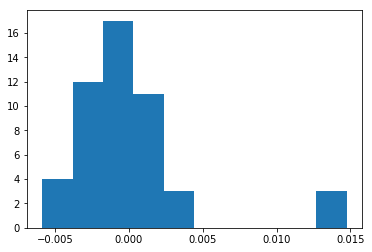

In [67]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[7])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[7])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


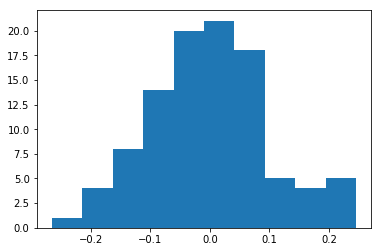

Gradientes despues de entrenar(ultima capa oculta):


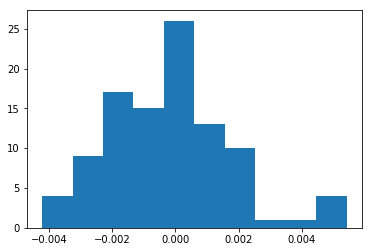

In [68]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[5])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[5])
plt.show()

Gradientes antes de entrenar(ultima capa oculta):


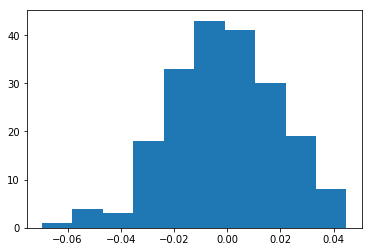

Gradientes despues de entrenar(ultima capa oculta):


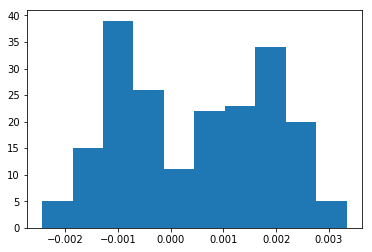

In [69]:
print("Gradientes antes de entrenar(ultima capa oculta):")
plt.hist(evaluated_gradients[3])
plt.show()
print("Gradientes despues de entrenar(ultima capa oculta):")
plt.hist(postevaluated_gradients[3])
plt.show()

# FFFFFFFFFFFF

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 3ms/step - loss: 110711312316061171712.0000 - val_loss: 49480876586138635075584.0000
Epoch 2/300
379/379 [==============================] - 0s 151us/step - loss: inf - val_loss: inf   
Epoch 3/300
379/379 [==============================] - 0s 137us/step - loss: nan - val_loss: nan
Epoch 4/300
379/379 [==============================] - 0s 148us/step - loss: nan - val_loss: nan
Epoch 5/300
379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s 140us/step - loss: nan - val_loss: nan
Epoch 7/300
379/379 [==============================] - 0s 151us/step - loss: nan - val_loss: nan
Epoch 8/300
379/379 [==============================] - 0s 132us/step - loss: nan - val_loss: nan
Epoch 9/300
379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 10/300
379/379 [==========

379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 84/300
379/379 [==============================] - 0s 143us/step - loss: nan - val_loss: nan
Epoch 85/300
379/379 [==============================] - 0s 137us/step - loss: nan - val_loss: nan
Epoch 86/300
379/379 [==============================] - 0s 140us/step - loss: nan - val_loss: nan
Epoch 87/300
379/379 [==============================] - 0s 143us/step - loss: nan - val_loss: nan
Epoch 88/300
379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 89/300
379/379 [==============================] - 0s 148us/step - loss: nan - val_loss: nan
Epoch 90/300
379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 91/300
379/379 [==============================] - 0s 140us/step - loss: nan - val_loss: nan
Epoch 92/300
379/379 [==============================] - 0s 148us/step - loss: nan - val_loss: nan
Epoch 93/300
379/379 [===========

379/379 [==============================] - 0s 148us/step - loss: nan - val_loss: nan
Epoch 167/300
379/379 [==============================] - 0s 143us/step - loss: nan - val_loss: nan
Epoch 168/300
379/379 [==============================] - 0s 145us/step - loss: nan - val_loss: nan
Epoch 169/300
379/379 [==============================] - 0s 148us/step - loss: nan - val_loss: nan
Epoch 170/300
379/379 [==============================] - 0s 140us/step - loss: nan - val_loss: nan
Epoch 171/300
379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 172/300
379/379 [==============================] - 0s 140us/step - loss: nan - val_loss: nan
Epoch 173/300
379/379 [==============================] - 0s 137us/step - loss: nan - val_loss: nan
Epoch 174/300
379/379 [==============================] - 0s 148us/step - loss: nan - val_loss: nan
Epoch 175/300
379/379 [==============================] - 0s 137us/step - loss: nan - val_loss: nan
Epoch 176/300
379/379 [=

Epoch 249/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 250/300
379/379 [==============================] - 0s 151us/step - loss: nan - val_loss: nan
Epoch 251/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 252/300
379/379 [==============================] - 0s 153us/step - loss: nan - val_loss: nan
Epoch 253/300
379/379 [==============================] - 0s 164us/step - loss: nan - val_loss: nan
Epoch 254/300
379/379 [==============================] - 0s 156us/step - loss: nan - val_loss: nan
Epoch 255/300
379/379 [==============================] - 0s 161us/step - loss: nan - val_loss: nan
Epoch 256/300
379/379 [==============================] - 0s 145us/step - loss: nan - val_loss: nan
Epoch 257/300
379/379 [==============================] - 0s 166us/step - loss: nan - val_loss: nan
Epoch 258/300
379/379 [==============================] - 0s 145us/step - loss: nan - val_loss: nan
Epoch 259/

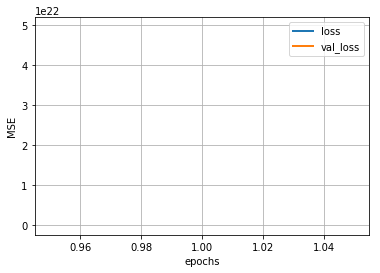

In [74]:
model = Sequential()
model.add(Dense(775, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

# Comportamiento del error durante el tiempo
listaloss = []
listaval = []
for i in range(300):
    listaloss.append(hist.history['loss'][i])
    listaval.append(hist.history['val_loss'][i])

plt.plot(range(301)[1:],listaloss,label='loss', linewidth=2)
plt.plot(range(301)[1:],listaval,label='val_loss', linewidth=2)

plt.legend(['loss', 'val_loss'])
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid(1)
plt.show()